# DESI EDR

hdu -> Header Data Unit -> Estructura y metadata en ASCII

LSS -> Large-Scale Structura

fits -> 2880 bytes of 8 bits

In [127]:
from astropy.io import fits
from astropy.table import Table as t
from astropy.cosmology import WMAP9 as cosmo

from astropy.io import misc
import h5py

import numpy as np
import matplotlib.pyplot as plt

In [2]:
with fits.open('./data/BGS_BRIGHT_N_0_clustering.ran.fits') as hdu:
    table = t(hdu[1].data)

table

TARGETID,RA,DEC,NTILE,TILES,ROSETTE_NUMBER,ROSETTE_R,COMP_TILE,Z,WEIGHT,FLUX_G_DERED,FLUX_R_DERED,FLUX_Z_DERED,FLUX_W1_DERED,FLUX_W2_DERED,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
int64,float64,float64,int64,str43,int32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327863312287006861,217.053993747975,32.844339582840995,2,208-211,7,1.6750873838143794,1.0,0.18115679145762623,1.015748031496063,6.6309824,18.932077,35.924744,29.712479,19.276299,0.913697512951229,0.0012333256040872181,0.22658534268215497,0.2280468116260682,0.6059796980666337,0.7611166435887314,-0.17572208771389744,-0.07872208771389744,-19.632476208497035,0.012707690463455164,0.01149153305805754
327863312287006871,216.96105123277434,32.85843363693025,1,205,7,1.6924289577861624,0.36363636363636365,0.3624525260132444,1.0,3.9206953,16.545471,47.05639,96.634056,70.364136,0.8868703457149468,0.2667498075435105,0.9431691041625481,0.4940502618053929,1.3128088477039455,0.7445310564354318,-0.3515789502328471,-0.2545789502328471,-21.463138755612505,0.0013972681760458132,0.09561734123289738
327863312287006915,217.05116530360402,32.847663141703265,2,208-211,7,1.6728731797200223,1.0,0.3009988823837262,1.0,4.7546234,18.697203,42.036736,61.6634,40.48283,0.9167673988193118,0.17254855948451037,0.742431627584144,0.3993063207665398,1.12294222251721,0.763014565168275,-0.2919689159122144,-0.19496891591221438,-21.03403880342944,0.003713248311710263,0.03826194249707034
327863312287006987,217.0442969494446,32.86749656185846,4,202-205-208-211,7,1.6566218761348026,1.0,0.269749437606277,1.0,11.32772,27.69174,49.815468,60.47266,46.467403,0.6156013150497894,-0.002619240838966419,0.35229755629386134,0.2150089861993652,0.622131157387025,0.5633959409949574,-0.2616569544780887,-0.1646569544780887,-21.012606847797727,0.008313487102263754,0.017459485623234086
327863312287007608,217.05123979169434,32.85948789907687,3,205-208-211,7,1.6618672119726665,0.875,0.38642550584480345,1.0,5.126405,15.922154,32.868187,47.95785,36.34013,0.6500899520510693,0.1312660664496864,0.7116486790958827,0.3512462419400154,0.9942614139904594,0.5874573926468216,-0.3748327406694593,-0.2778327406694593,-21.44874774024723,0.0009571040215082368,0.13371119385114222
327863312287007688,216.98216862256743,32.86499544647257,2,205-211,7,1.6792381694892633,0.96,0.05474407320670259,1.0,84.82311,145.53484,214.5928,157.55905,95.49745,0.6358525777185176,-0.14666822215333003,-0.19638875031130065,0.0723410373068668,0.08094858586080028,0.5775245010066135,-0.05310175101050151,0.04389824898949849,-18.92369934834769,0.0504667514780847,0.0029186997834375608
327863312287007980,216.99280256908355,32.85273945429143,1,205,7,1.6869210666857204,0.36363636363636365,0.040109717978985916,1.0,160.24985,276.7486,411.52878,368.69748,244.49443,0.6545562614810303,-0.16498447526276305,-0.22632097966371512,0.05530027966193296,0.057946664521764224,0.5905733722202469,-0.03890642643961634,0.058093573560383666,-18.905128620907895,0.08453159877481627,0.0017445635962380836
327863312287008123,217.0097205677191,32.830868129084884,1,211,7,1.701539079552833,0.45714285714285713,0.10301862103966075,1.0,82.64186,210.44333,395.66196,338.20026,216.05219,1.0070327040615938,-0.09922116303776386,-0.09141469473607652,0.13528614852658283,0.30710619737553724,0.8430191235143268,-0.09992806240847092,-0.0029280624084709237,-20.8157261994326,0.020758901725607407,0.007066106315277897
327863312287008353,217.0434195828927,32.83808660534789,2,208-211,7,1.6841780523815808,1.0,0.14433940320340033,1.0,54.22743,100.89277,159.01653,125.48583,87.38373,0.601318276631374,-0.07434922848462558,-0.0015647219128746004,0.14209043688551184,0.26302957914539926,0.5531636409432376,-0.14000922110729833,-0.043009221107298316,-20.831959090486425,0.024799977701634248,0.005921525235303553


In [3]:
hdu.info() #* Es una tabla binaria

Filename: ./data/BGS_BRIGHT_N_0_clustering.ran.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  LSS           1 BinTableHDU     73   215721R x 26C   [K, D, D, K, 43A, J, D, D, D, D, E, E, E, E, E, D, D, D, D, D, D, D, D, D, D, D]   


In [4]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  219 / length of dimension 1                          
NAXIS2  =               215721 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   26 / number of table fields                         
TTYPE1  = 'TARGETID'                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '                                                            
TUNIT2  = 'deg     '        

In [5]:
hdu = fits.open('./data/BGS_BRIGHT_N_0_clustering.ran.fits')
data = hdu[1].data #! Lo tengo que abrir otra vez para que no salga error ???
data

FITS_rec([(327863312287006861, 217.05399375, 32.84433958, 2, '208-211',  7, 1.67508738, 1.        , 0.18115679, 1.01574803,  6.6309824, 18.932077, 35.924744, 29.712479, 19.276299, 0.91369751,  0.00123333,  0.22658534, 0.22804681, 0.6059797 , 0.76111664, -0.17572209, -0.07872209, -19.63247621, 0.01270769, 0.01149153),
          (327863312287006871, 216.96105123, 32.85843364, 1, '205',  7, 1.69242896, 0.36363636, 0.36245253, 1.        ,  3.9206953, 16.545471, 47.05639 , 96.634056, 70.364136, 0.88687035,  0.26674981,  0.9431691 , 0.49405026, 1.31280885, 0.74453106, -0.35157895, -0.25457895, -21.46313876, 0.00139727, 0.09561734),
          (327863312287006915, 217.0511653 , 32.84766314, 2, '208-211',  7, 1.67287318, 1.        , 0.30099888, 1.        ,  4.7546234, 18.697203, 42.036736, 61.6634  , 40.48283 , 0.9167674 ,  0.17254856,  0.74243163, 0.39930632, 1.12294222, 0.76301457, -0.29196892, -0.19496892, -21.0340388 , 0.00371325, 0.03826194),
          ...,
          (327863846674893525, 2

In [6]:
np.shape(data)

(215721,)

### Necesito 3 coordenadas -> tengo RA, DEC, Z

In [7]:
data.columns #! Que es formato K y 43A?

ColDefs(
    name = 'TARGETID'; format = 'K'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'NTILE'; format = 'K'
    name = 'TILES'; format = '43A'
    name = 'ROSETTE_NUMBER'; format = 'J'
    name = 'ROSETTE_R'; format = 'D'; unit = 'deg'
    name = 'COMP_TILE'; format = 'D'
    name = 'Z'; format = 'D'
    name = 'WEIGHT'; format = 'D'
    name = 'FLUX_G_DERED'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_R_DERED'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_Z_DERED'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_W1_DERED'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_W2_DERED'; format = 'E'; unit = 'nanomaggy'
    name = 'REST_GMR_0P1'; format = 'D'
    name = 'KCORR_R0P1'; format = 'D'
    name = 'KCORR_G0P1'; format = 'D'
    name = 'KCORR_R0P0'; format = 'D'
    name = 'KCORR_G0P0'; format = 'D'
    name = 'REST_GMR_0P0'; format = 'D'
    name = 'EQ_ALL_0P0'; format = 'D'
    name = 'EQ_ALL_0P1'; format =

### Formatos

'A': Cadena de caracteres (texto).

'I': Número entero con signo (entero).

'J': Número entero largo con signo (entero largo).

'E': Número en notación científica de precisión simple.

'D': Número de punto flotante de doble precisión.

'L': Valor lógico (verdadero o falso).

In [8]:
table['Z']

0.18115679145762623
0.3624525260132444
0.3009988823837262
0.269749437606277
0.38642550584480345
0.05474407320670259
0.040109717978985916
0.10301862103966075
0.14433940320340033
0.2776172835715325
0.21679937117998668


In [9]:
max(table['Z']) #! Z<0.6

0.59899602949955

In [97]:
d = cosmo.comoving_distance(table['Z'])
d

<Quantity [ 751.88840166, 1438.77437216, 1213.3743285 , ..., 1234.02821237,
            356.25333197, 1343.92264421] Mpc>

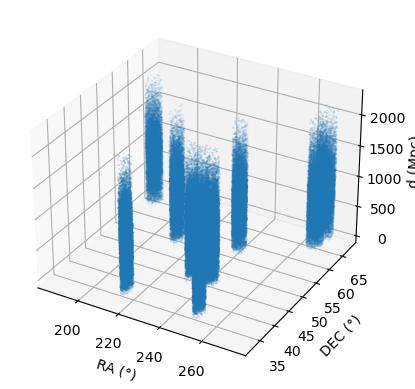

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('')

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')
ax.set_zlabel('d (Mpc)')

ax.scatter(table['RA'], table['DEC'], d, s=0.01)

Text(0.5, 0.92, 'Rosette n')

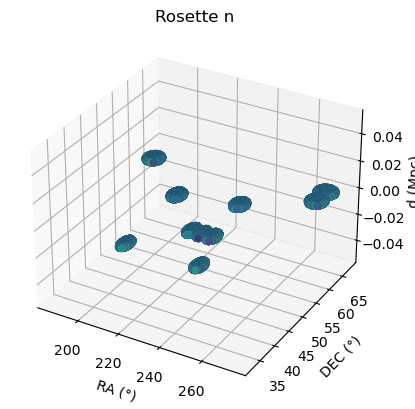

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('')

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')
ax.set_zlabel('d (Mpc)')

ax.scatter(table['RA'], table['DEC'], c=d, cmap='viridis')
ax.set_title('Rosette n')

In [13]:
hdu.close()

----------------------------------------------------

## BGS clustering

In [14]:
with fits.open('./data/BGS_BRIGHT_N_0_clustering.ran.fits') as hdu:
    table = t(hdu[1].data)

table

TARGETID,RA,DEC,NTILE,TILES,ROSETTE_NUMBER,ROSETTE_R,COMP_TILE,Z,WEIGHT,FLUX_G_DERED,FLUX_R_DERED,FLUX_Z_DERED,FLUX_W1_DERED,FLUX_W2_DERED,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
int64,float64,float64,int64,str43,int32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327863312287006861,217.053993747975,32.844339582840995,2,208-211,7,1.6750873838143794,1.0,0.18115679145762623,1.015748031496063,6.6309824,18.932077,35.924744,29.712479,19.276299,0.913697512951229,0.0012333256040872181,0.22658534268215497,0.2280468116260682,0.6059796980666337,0.7611166435887314,-0.17572208771389744,-0.07872208771389744,-19.632476208497035,0.012707690463455164,0.01149153305805754
327863312287006871,216.96105123277434,32.85843363693025,1,205,7,1.6924289577861624,0.36363636363636365,0.3624525260132444,1.0,3.9206953,16.545471,47.05639,96.634056,70.364136,0.8868703457149468,0.2667498075435105,0.9431691041625481,0.4940502618053929,1.3128088477039455,0.7445310564354318,-0.3515789502328471,-0.2545789502328471,-21.463138755612505,0.0013972681760458132,0.09561734123289738
327863312287006915,217.05116530360402,32.847663141703265,2,208-211,7,1.6728731797200223,1.0,0.3009988823837262,1.0,4.7546234,18.697203,42.036736,61.6634,40.48283,0.9167673988193118,0.17254855948451037,0.742431627584144,0.3993063207665398,1.12294222251721,0.763014565168275,-0.2919689159122144,-0.19496891591221438,-21.03403880342944,0.003713248311710263,0.03826194249707034
327863312287006987,217.0442969494446,32.86749656185846,4,202-205-208-211,7,1.6566218761348026,1.0,0.269749437606277,1.0,11.32772,27.69174,49.815468,60.47266,46.467403,0.6156013150497894,-0.002619240838966419,0.35229755629386134,0.2150089861993652,0.622131157387025,0.5633959409949574,-0.2616569544780887,-0.1646569544780887,-21.012606847797727,0.008313487102263754,0.017459485623234086
327863312287007608,217.05123979169434,32.85948789907687,3,205-208-211,7,1.6618672119726665,0.875,0.38642550584480345,1.0,5.126405,15.922154,32.868187,47.95785,36.34013,0.6500899520510693,0.1312660664496864,0.7116486790958827,0.3512462419400154,0.9942614139904594,0.5874573926468216,-0.3748327406694593,-0.2778327406694593,-21.44874774024723,0.0009571040215082368,0.13371119385114222
327863312287007688,216.98216862256743,32.86499544647257,2,205-211,7,1.6792381694892633,0.96,0.05474407320670259,1.0,84.82311,145.53484,214.5928,157.55905,95.49745,0.6358525777185176,-0.14666822215333003,-0.19638875031130065,0.0723410373068668,0.08094858586080028,0.5775245010066135,-0.05310175101050151,0.04389824898949849,-18.92369934834769,0.0504667514780847,0.0029186997834375608
327863312287007980,216.99280256908355,32.85273945429143,1,205,7,1.6869210666857204,0.36363636363636365,0.040109717978985916,1.0,160.24985,276.7486,411.52878,368.69748,244.49443,0.6545562614810303,-0.16498447526276305,-0.22632097966371512,0.05530027966193296,0.057946664521764224,0.5905733722202469,-0.03890642643961634,0.058093573560383666,-18.905128620907895,0.08453159877481627,0.0017445635962380836
327863312287008123,217.0097205677191,32.830868129084884,1,211,7,1.701539079552833,0.45714285714285713,0.10301862103966075,1.0,82.64186,210.44333,395.66196,338.20026,216.05219,1.0070327040615938,-0.09922116303776386,-0.09141469473607652,0.13528614852658283,0.30710619737553724,0.8430191235143268,-0.09992806240847092,-0.0029280624084709237,-20.8157261994326,0.020758901725607407,0.007066106315277897
327863312287008353,217.0434195828927,32.83808660534789,2,208-211,7,1.6841780523815808,1.0,0.14433940320340033,1.0,54.22743,100.89277,159.01653,125.48583,87.38373,0.601318276631374,-0.07434922848462558,-0.0015647219128746004,0.14209043688551184,0.26302957914539926,0.5531636409432376,-0.14000922110729833,-0.043009221107298316,-20.831959090486425,0.024799977701634248,0.005921525235303553


In [15]:
hdu = fits.open('./data/BGS_ANY_N_clustering.dat.fits')
data_bgs = hdu[1].data
t(data_bgs)

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,ROSETTE_NUMBER,ROSETTE_R,FRACZ_TILELOCID,BITWEIGHTS,PROB_OBS,WEIGHT_ZFAIL,WEIGHT,FLUX_G_DERED,FLUX_R_DERED,FLUX_Z_DERED,FLUX_W1_DERED,FLUX_W2_DERED,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
float64,float64,int64,int64,str43,float64,float64,int32,float64,float64,int64[2],float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.4318181818181818,3,1.5743490921284766,0.3333333333333333,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.17648761247894723,-20.57725329656256,0.0076878089647186044,0.0189012692383565
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.4318181818181818,3,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.16524719308379415,-20.687302138556465,0.0076878089647186044,0.0189012692383565
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.4318181818181818,3,1.7267282368438097,0.2,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.07091749460706011,-19.887912075290714,0.017861571797760857,0.008223843310435642
188.7298325265811,60.181046704454054,39633390164510257,1,100,0.2854181586411897,0.4318181818181818,3,1.7154596184117625,0.3333333333333333,601583918157758562 .. -8934769733576671188,0.265625,1.0,3.6857142857142855,9.799708,23.07847,40.24855,43.608025,32.920425,0.5506603859408487,-0.027984211522950803,0.35134044892291943,0.17986420125298275,0.5984338493516907,0.5114153982880107,-0.276855613881954,-0.17985561388195398,-20.929555511419682,0.0076878089647186044,0.0189012692383565
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.4318181818181818,3,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.2657844171660754,-21.569963262664427,0.0025093016341671114,0.055734255355941044
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.4318181818181818,3,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.11108736124856688,-20.1232008271341,0.014175378619991408,0.010340274472459292
188.7327720032468,60.217374759371836,39633390164510283,1,100,0.23282508447174644,0.4318181818181818,3,1.680631967400249,0.25,-1 .. -1,1.0,1.0,1.0,14.161283,45.448513,84.034935,83.2855,57.59129,0.8939001425702994,0.06443304616627457,0.43657561294656116,0.29160589516251845,0.8087714571397985,0.7488771473733059,-0.22584033193759404,-0.12884033193759403,-21.255057084367362,0.013312673657954965,0.011002985286624948
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.4318181818181818,3,1.6990866107210438,0.3333333333333333,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.030741839754296674,0.1465510581719544,0.1934014143564434,0.4517835654815496,0.6300474905985266,-0.17874423352

In [16]:
n_r = np.unique(data_bgs['ROSETTE_NUMBER'])
n_r

array([ 3,  6,  7, 11, 12, 13, 14, 15, 18, 19], dtype=int32)

In [17]:
rosette_n = data_bgs[data_bgs['ROSETTE_NUMBER'] == 3]
rosette_n

FITS_rec([(191.14757099, 60.34581596, 39633390185480938, 1, '100', 0.28194599, 0.43181818, 3, 1.57434909, 0.33333333, [-8790991219464744880, -4387867067969646830], 0.3203125, 1., 3.07142857,  6.782468 , 16.732075, 29.996437, 31.939342, 25.343126, 0.60310555, -0.00070293, 0.37659733, 0.21603985, 0.64180908, 0.55463657, -0.27348761, -0.17648761, -20.5772533 , 0.00768781, 0.01890127),
          (187.0511725 , 62.61454227, 39633416324383107, 1, '100', 0.27035793, 0.43181818, 3, 1.55798544, 1.        , [                  -1,                   -1], 1.       , 1., 1.        ,  4.4575434, 17.798513, 37.420948, 46.075268, 30.963612, 0.99617708,  0.14640987, 0.6534524 , 0.37973343, 1.05020452, 0.83274851, -0.26224719, -0.16524719, -20.68730214, 0.00768781, 0.01890127),
          (187.83760709, 60.38987544, 39633393155049303, 1, '100', 0.17311082, 0.43181818, 3, 1.72672824, 0.2       , [-6539912815536352385,  9025372152329235987], 0.546875 , 1., 1.81690141, 13.26433  , 27.728409, 46.020153, 37.03

Text(0.5, 0.92, 'Rosette 3')

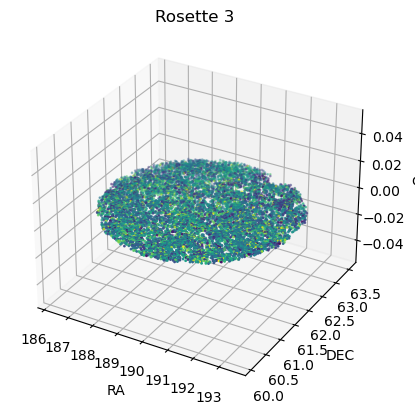

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

d = cosmo.comoving_distance(rosette_n['Z'])

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('d')

ax.scatter(rosette_n['RA'], rosette_n['DEC'], c=d, s=1, cmap='viridis')
ax.set_title('Rosette 3')

Text(0.5, 1.0, 'Rosette 3')

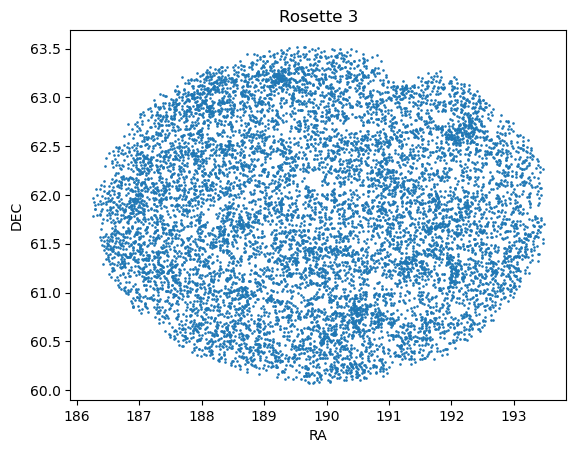

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)

rosette_3 = data_bgs[data_bgs['ROSETTE_NUMBER'] == 3]
d3 = cosmo.comoving_distance(rosette_3['Z'])

ax.set_xlabel('RA')
ax.set_ylabel('DEC')

ax.scatter(rosette_3['RA'], rosette_3['DEC'], s=0.8)
ax.set_title('Rosette 3')

In [18]:
t(rosette_n)

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,ROSETTE_NUMBER,ROSETTE_R,FRACZ_TILELOCID,BITWEIGHTS,PROB_OBS,WEIGHT_ZFAIL,WEIGHT,FLUX_G_DERED,FLUX_R_DERED,FLUX_Z_DERED,FLUX_W1_DERED,FLUX_W2_DERED,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
float64,float64,int64,int64,str43,float64,float64,int32,float64,float64,int64[2],float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.4318181818181818,3,1.5743490921284766,0.3333333333333333,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.17648761247894723,-20.57725329656256,0.0076878089647186044,0.0189012692383565
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.4318181818181818,3,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.16524719308379415,-20.687302138556465,0.0076878089647186044,0.0189012692383565
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.4318181818181818,3,1.7267282368438097,0.2,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.07091749460706011,-19.887912075290714,0.017861571797760857,0.008223843310435642
188.7298325265811,60.181046704454054,39633390164510257,1,100,0.2854181586411897,0.4318181818181818,3,1.7154596184117625,0.3333333333333333,601583918157758562 .. -8934769733576671188,0.265625,1.0,3.6857142857142855,9.799708,23.07847,40.24855,43.608025,32.920425,0.5506603859408487,-0.027984211522950803,0.35134044892291943,0.17986420125298275,0.5984338493516907,0.5114153982880107,-0.276855613881954,-0.17985561388195398,-20.929555511419682,0.0076878089647186044,0.0189012692383565
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.4318181818181818,3,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.2657844171660754,-21.569963262664427,0.0025093016341671114,0.055734255355941044
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.4318181818181818,3,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.11108736124856688,-20.1232008271341,0.014175378619991408,0.010340274472459292
188.7327720032468,60.217374759371836,39633390164510283,1,100,0.23282508447174644,0.4318181818181818,3,1.680631967400249,0.25,-1 .. -1,1.0,1.0,1.0,14.161283,45.448513,84.034935,83.2855,57.59129,0.8939001425702994,0.06443304616627457,0.43657561294656116,0.29160589516251845,0.8087714571397985,0.7488771473733059,-0.22584033193759404,-0.12884033193759403,-21.255057084367362,0.013312673657954965,0.011002985286624948
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.4318181818181818,3,1.6990866107210438,0.3333333333333333,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.030741839754296674,0.1465510581719544,0.1934014143564434,0.4517835654815496,0.6300474905985266,-0.17874423352

In [19]:
id = rosette_n['TARGETID']
id

array([39633390185480938, 39633416324383107, 39633393155049303, ...,
       39633410666268292, 39633413505811644, 39633416366328637])

## Probabilistic Value-Added

In [20]:
data_prova = misc.hdf5.read_table_hdf5('./data/BGS_ANY_full.provabgs.sv3.v0.hdf5')
data_prova #! PROVABGS_LOGMSTAR_BF

TARGETID,RA,DEC,Z_HP,ZERR,TSNR2_BGS,MAG_G,MAG_R,MAG_Z,MAG_W1,FIBMAG_R,HPIX_64,PROVABGS_MCMC,PROVABGS_THETA_BF,PROVABGS_Z_MAX,PROVABGS_LOGMSTAR_BF,PROVABGS_LOGMSTAR,SCHLEGEL_COLOR,PROVABGS_W_ZFAIL,PROVABGS_W_FIBASSIGN,IS_BGS_BRIGHT,IS_BGS_FAINT
int64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,int64,"float64[100,13]",float64[13],float64,float64,float64[100],float64,float64,float64,bool,bool
39633390185481181,191.17913199949842,60.25733587654764,0.2004070714061304,nan,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0 .. -999.0,-999.0 .. -999.0,-999.0,-999.0,-999.0 .. -999.0,-999.0,-999.0,129.0,False,False
39633390164510024,188.6998080571996,60.21175772175424,0.2004070714061304,nan,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0 .. -999.0,-999.0 .. -999.0,-999.0,-999.0,-999.0 .. -999.0,-999.0,-999.0,3.225,False,False
39633390185480955,191.14955067198017,60.34047183206205,0.2004070714061304,nan,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0 .. -999.0,-999.0 .. -999.0,-999.0,-999.0,-999.0 .. -999.0,-999.0,-999.0,129.0,False,False
39633390185480938,191.14757099005186,60.345815959235,0.2819459922463374,2.191690764397e-05,1361.7778,20.420939956138607,19.440977833152942,18.807486906915823,18.725561063547207,21.083244145949642,11226,11.091623656909688 .. 0.3684622521221414,11.14249424405227 .. 0.3651476796540595,0.2891440449335749,10.894820213317871,10.848259925842285 .. 10.952618598937988,0.1059712957858181,1.0671457830611217,3.0714285714285716,True,False
39633416324383107,187.05117249536465,62.614542270156655,0.2703579310142208,0.00018002802349298926,1218.0295,20.876585604498494,19.373871860075226,18.567397256862876,18.32574859422363,20.212708263179056,11251,11.127879812361321 .. 0.6691898790548064,11.16028636319183 .. 0.6710591095679554,0.2822033708476234,10.909546852111816,10.877055168151855 .. 10.874772071838379,-0.3616078306686752,1.005530547154544,1.0,True,False
39633393155049062,187.8080794399063,60.39356441584356,0.2004070714061304,nan,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0 .. -999.0,-999.0 .. -999.0,-999.0,-999.0,-999.0 .. -999.0,-999.0,-999.0,129.0,False,False
39633393155049303,187.83760708675698,60.38987543677365,0.1731108191825362,2.1990725452772437e-05,1234.5317,19.69273753706838,18.892550253715136,18.34277957526595,18.565848448993197,21.00700131929247,11237,10.462320138967206 .. 0.2729800106294297,10.502975152735333 .. 0.2744993206027024,0.21924790414805623,10.27071762084961,10.239782333374023 .. 10.281316757202148,0.01670638624886256,1.0556176146427896,1.8169014084507042,True,False
39633393155049428,187.8512261193913,60.382096424983686,0.2004070714061304,nan,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0 .. -999.0,-999.0 .. -999.0,-999.0,-999.0,-999.0 .. -999.0,-999.0,-999.0,2.1864406779661016,False,False
39633390164510257,188.7298325265811,60.181046704454054,0.2854181586411897,8.005616412868143e-06,1080.5574,20.021376563811977,19.091834839420468,18.488285412624066,18.38746082854565,20.641812033703985,11237,11.113035968148562 .. 0.3947223033620342,11.257075728183183 .. 0.3983021711356034,0.32988420863892076,11.017786979675293,10.893733024597168 .. 11.032293319702148,0.18537451480860634,1.0209118095758252,3.6857142857142855,True,False


In [21]:
data_prova.info()

<Table length=264973>
        name          dtype    shape   n_bad
-------------------- ------- --------- -----
            TARGETID   int64               0
                  RA float64               0
                 DEC float64               0
                Z_HP float64               0
                ZERR float64           16626
           TSNR2_BGS float32               0
               MAG_G float64               0
               MAG_R float64               0
               MAG_Z float64               0
              MAG_W1 float64               0
            FIBMAG_R float64               0
             HPIX_64   int64               0
       PROVABGS_MCMC float64 (100, 13)     0
   PROVABGS_THETA_BF float64     (13,)     0
      PROVABGS_Z_MAX float64               0
PROVABGS_LOGMSTAR_BF float64               0
   PROVABGS_LOGMSTAR float64    (100,)     0
      SCHLEGEL_COLOR float64               0
    PROVABGS_W_ZFAIL float64               0
PROVABGS_W_FIBASSIGN float64     

----
### hpy5

In [22]:
data_prova = h5py.File('./data/BGS_ANY_full.provabgs.sv3.v0.hdf5')
data_prova

<HDF5 file "BGS_ANY_full.provabgs.sv3.v0.hdf5" (mode r)>

In [23]:
list(data_prova.keys())

['__astropy_table__']

In [24]:
dataset = data_prova['__astropy_table__']
dataset.dtype

dtype([('TARGETID', '<i8'), ('RA', '<f8'), ('DEC', '<f8'), ('Z_HP', '<f8'), ('ZERR', '<f8'), ('TSNR2_BGS', '<f4'), ('MAG_G', '<f8'), ('MAG_R', '<f8'), ('MAG_Z', '<f8'), ('MAG_W1', '<f8'), ('FIBMAG_R', '<f8'), ('HPIX_64', '<i8'), ('PROVABGS_MCMC', '<f8', (100, 13)), ('PROVABGS_THETA_BF', '<f8', (13,)), ('PROVABGS_Z_MAX', '<f8'), ('PROVABGS_LOGMSTAR_BF', '<f8'), ('PROVABGS_LOGMSTAR', '<f8', (100,)), ('SCHLEGEL_COLOR', '<f8'), ('PROVABGS_W_ZFAIL', '<f8'), ('PROVABGS_W_FIBASSIGN', '<f8'), ('IS_BGS_BRIGHT', '?'), ('IS_BGS_FAINT', '?')])

In [44]:
selected = []

for n in range(0, np.size(dataset)): #! t ~10min
    if dataset[n][0] in id:
        selected.append((dataset[n][0], dataset[n][15]))

In [116]:
selected = []

for n in range(0, 1000):
    if dataset[n][0] in id:
        selected.append((dataset[n][0], dataset[n][15]))

In [117]:
selected = np.array(selected)
np.size(id), np.size(selected)

#np.size(np.unique(id)) #! repetidos???

(11313, 254)

In [118]:
mass = selected
node_info = []
edge_info = []

for j in range(0, len(mass)):
    data_j = data_bgs[data_bgs['TARGETID'] == mass[j][0]]

    flux_g = data_j['FLUX_G_DERED'][0]
    flux_r = data_j['FLUX_R_DERED'][0]
    flux_z = data_j['FLUX_Z_DERED'][0]
    flux_w1 = data_j['FLUX_W1_DERED'][0]
    flux_w2 = data_j['FLUX_W2_DERED'][0]
    node_info.append([mass[j][0], [mass[j][1],flux_g,flux_r,flux_z,flux_w1,flux_w2]])

    d_n = cosmo.comoving_distance(data_j['Z'])
    edge_info.append([mass[j][0], d_n])

In [122]:
edge_info

[[3.9633390185480936e+16, <Quantity [1141.94632154] Mpc>],
 [3.96334163243831e+16, <Quantity [1098.14464909] Mpc>],
 [3.9633393155049304e+16, <Quantity [719.86728767] Mpc>],
 [3.963339016451026e+16, <Quantity [1155.0178941] Mpc>],
 [3.9633396124617896e+16, <Quantity [1480.29872873] Mpc>],
 [3.963339016870473e+16, <Quantity [883.28843686] Mpc>],
 [3.963339016451028e+16, <Quantity [954.41014908] Mpc>],
 [3.963339016870421e+16, <Quantity [764.25290169] Mpc>],
 [3.963340780155832e+16, <Quantity [364.00361509] Mpc>],
 [3.96334078015593e+16, <Quantity [1259.44862518] Mpc>],
 [3.963338714461233e+16, <Quantity [1659.96241643] Mpc>],
 [3.963338714880503e+16, <Quantity [1467.85488489] Mpc>],
 [3.963338714880581e+16, <Quantity [890.10222087] Mpc>],
 [3.963339018548134e+16, <Quantity [380.2760493] Mpc>],
 [3.963339015612285e+16, <Quantity [1372.92429134] Mpc>],
 [3.963339015612341e+16, <Quantity [528.24462431] Mpc>],
 [3.963339016031702e+16, <Quantity [441.97470733] Mpc>],
 [3.963339016031785e+16,